<a href="https://colab.research.google.com/github/sewon3191/2021_cphys2/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST**
- 2개의 히든 레이어를 도입한다.

- input layer는 28*28개의 노드

- hidden layer의 노드의 수는 자유롭게 설정해도 좋다.

- output은 10개(0~9)로 설정한다.

## test data를 예측하여 정확도를 최대가 되도록 학습하여라.
- 제출 시 test data의 정확도를 출력하여 제출하세요.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

train_data

test_data # 제출시 이 test 데이터에 대한 정확도를 출력하세요.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [3]:
train_data.data.size()

torch.Size([60000, 28, 28])

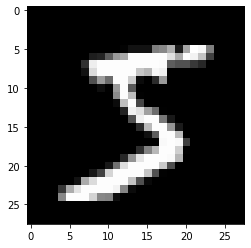

In [4]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')

In [5]:
train_data.data/255

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

## 오버피팅을 검사하기 위해 X_test, y_test 도입

In [7]:
X=torch.flatten(train_data.data,start_dim=1).float()
y=train_data.targets
X=X/255   #데이터 정규화

X_test=torch.flatten(test_data.data,start_dim=1).float()
y_test=test_data.targets
X_test=X_test/255   #데이터 정규화

In [8]:
din, dh1, dh2, dout = 28*28,128,64,10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [9]:
# training
nums_epoch = 1000
def train_value(model, criterion, optimizer, nums_epoch, X, y, X_test, y_test):
    for epoch in range(nums_epoch):
        y_pred = model(X)
        loss = criterion(y_pred,y)
        
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases
        
        if(epoch%100==0):
            y_pred = model(X)
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy_train = corrects.sum().float() / float( y.size(0) )

            y_test_pred = model(X_test)
            test_prediction = y_test_pred.max(1)[1] # max indices
            test_corrects = (test_prediction == y_test)
            accuracy_test = test_corrects.sum().float() / float( y_test_pred.size(0) )

            print(epoch, "loss=", loss.item(), "train=", accuracy_train.item(), "test=", accuracy_test.item())

In [10]:
train_value(model,criterion, optimizer, nums_epoch, X, y, X_test, y_test);

0 loss= 2.3022067546844482 train= 0.2592499852180481 test= 0.266400009393692
100 loss= 1.6247178316116333 train= 0.8467833399772644 test= 0.8490999937057495
200 loss= 1.5403562784194946 train= 0.9302499890327454 test= 0.9271000027656555
300 loss= 1.5208704471588135 train= 0.9477333426475525 test= 0.9398000240325928
400 loss= 1.5087329149246216 train= 0.9582333564758301 test= 0.9473999738693237
500 loss= 1.500076174736023 train= 0.9659833312034607 test= 0.9534000158309937
600 loss= 1.4935628175735474 train= 0.9714666604995728 test= 0.9591000080108643
700 loss= 1.4871668815612793 train= 0.977316677570343 test= 0.9629999995231628
800 loss= 1.4819672107696533 train= 0.9816666841506958 test= 0.9656999707221985
900 loss= 1.4786877632141113 train= 0.9840999841690063 test= 0.968500018119812


epoch가 900번일 때 train_data 와의 정확도는 약 98.4% test_data 와의 정확도는 약 96.9%로 나타나고 있으며 100번씩 나눠봤을 때 test_data의 정확도가 떨어지는 오버피팅 현상은 발생하지 않았다.

- test_data_accuracy : 96.8500018119812%